# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
unique_classes = set(y_train) 
n_classes = len(unique_classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

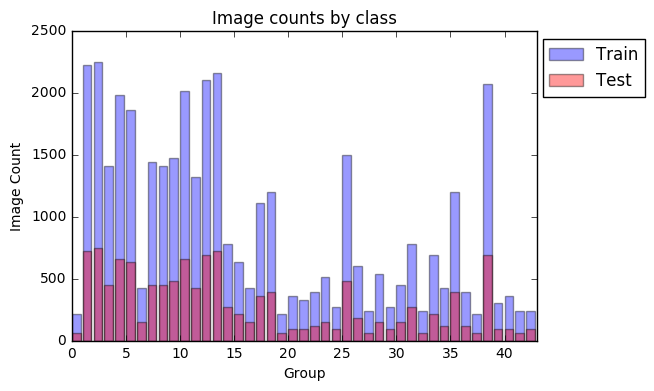

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
from IPython.display import HTML, display
import matplotlib
import pylab
import matplotlib.pyplot as plt
import numpy as np

# Visualizations will be shown in the notebook.
y_train_freq = np.bincount(y_train)
y_test_freq = np.bincount(y_test)

%matplotlib inline
opacity = 0.4

plt.bar(np.nonzero(y_train_freq)[0], y_train_freq, color='b', alpha=opacity, label='Train')
plt.bar(np.nonzero(y_test_freq)[0], y_test_freq, color='r', alpha=opacity, label='Test')

plt.xlabel('Group')
plt.ylabel('Image Count')
plt.title('Image counts by class')
plt.xlim(0, n_classes)
plt.legend(bbox_to_anchor=(1.25,1))

plt.show()

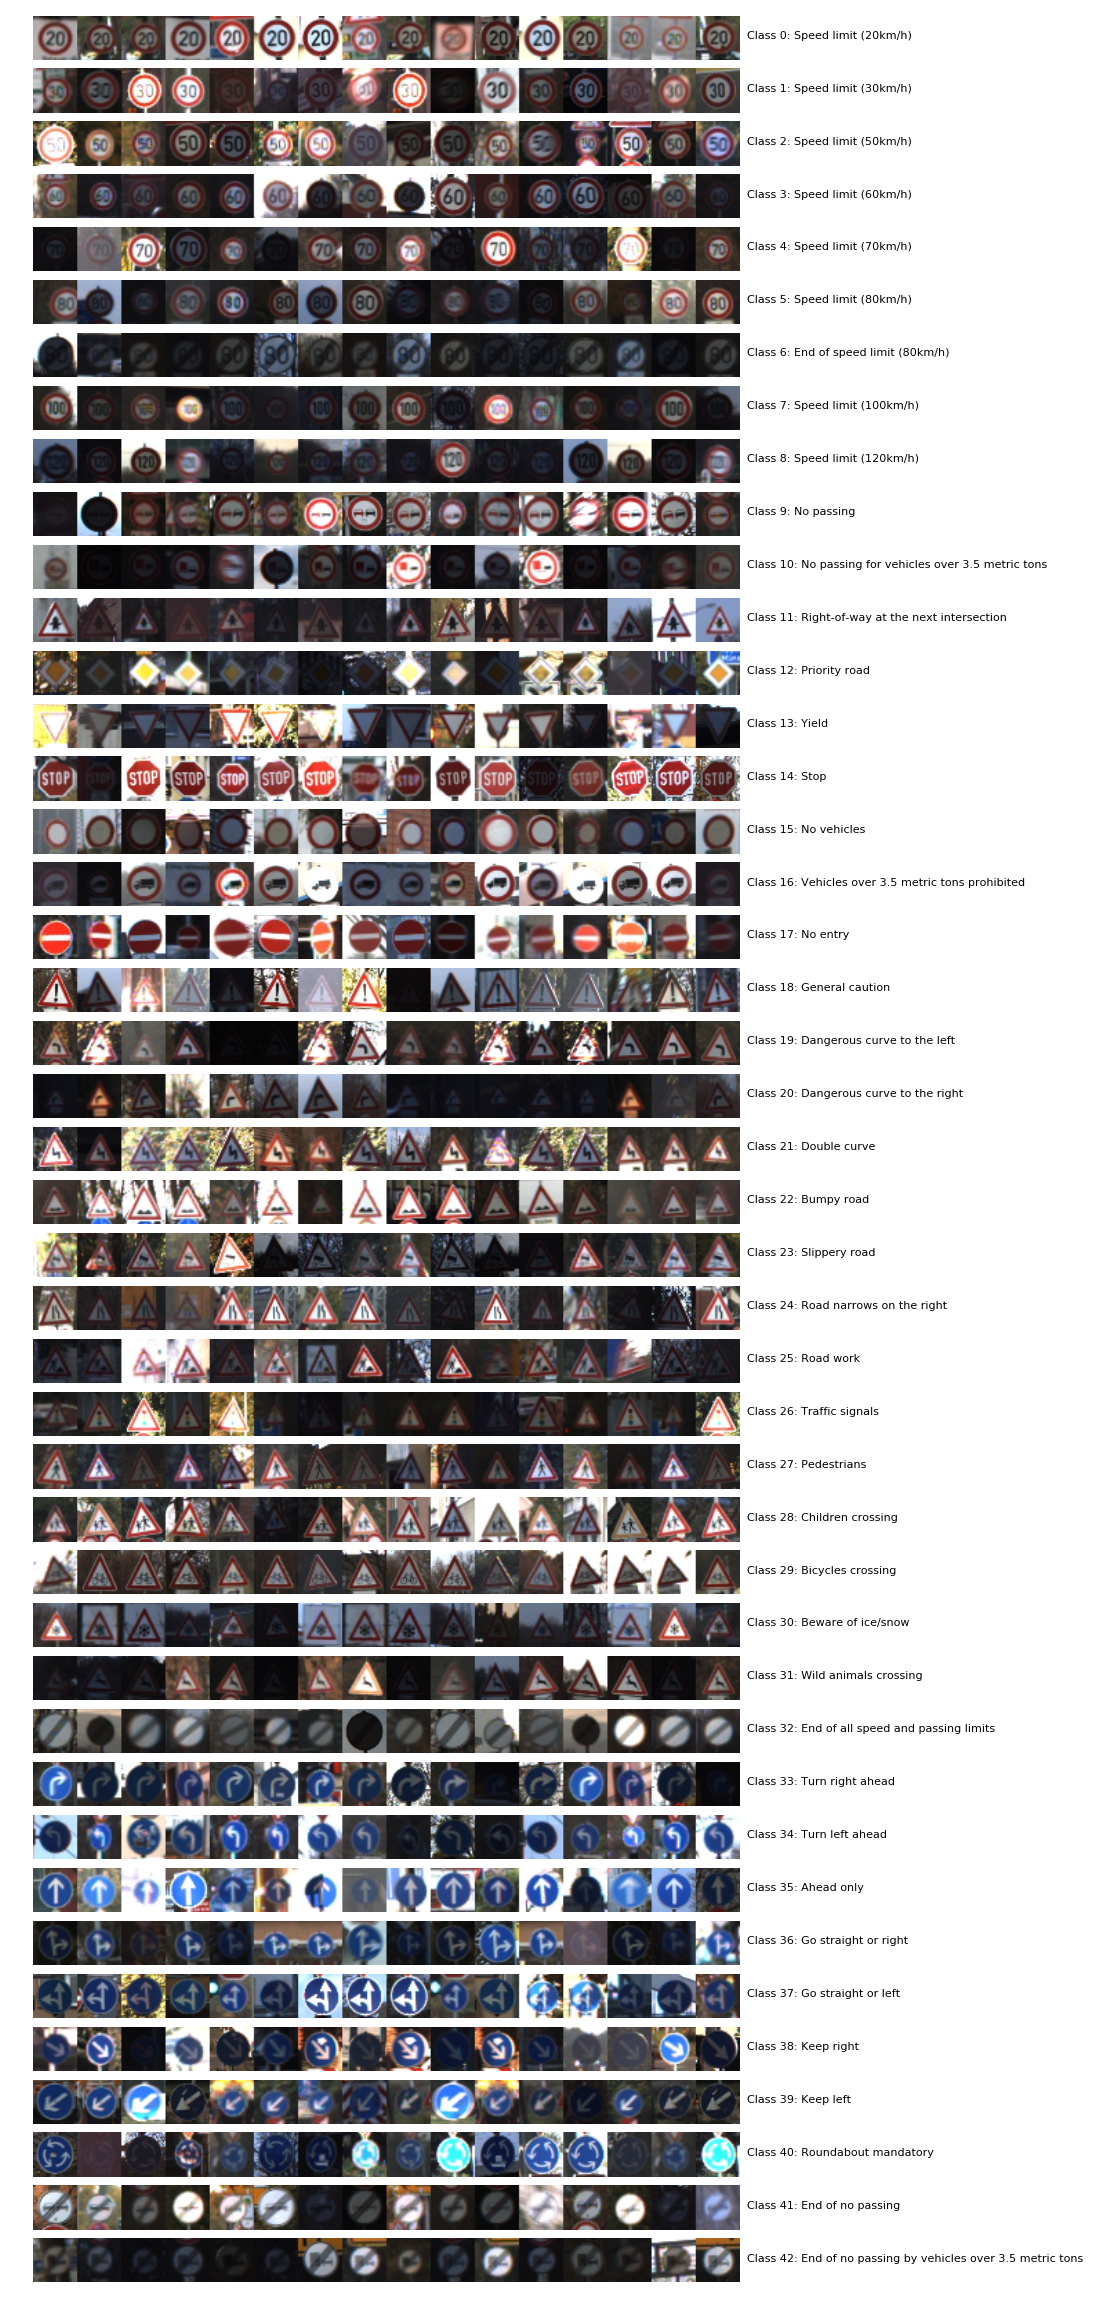

In [4]:
import pandas

signname_file = './signnames.csv'
signnames = pandas.read_csv(signname_file)
assert(n_classes == len(signnames['ClassId']))
assert(unique_classes == set(signnames['ClassId']))
signnames = {row[0]:row[1] for row in signnames.values}

num_samples=15
sample_images = {cls:[] for cls in sorted(unique_classes)}
for i in np.random.choice(len(y_train), len(y_train)):
    if len(sample_images[y_train[i]])>num_samples: continue
    sample_images[y_train[i]].append((y_train[i], X_train[i]))

display(HTML('<h5>15 Randomly Selected Samples From Each Of The Classes</h5>'))
font={'size':8, 'weight':'normal'}
plt.figure(figsize=(20, (n_classes+2)*.65))
plt.axis('off')
sub_plot_num=1
for key,val in sorted(signnames.items()):
    fig=plt.subplot(n_classes,1,sub_plot_num)
    sub_plot_num += 1
    fig.set_anchor('W')
    plt.axis('off')
    plt.imshow(np.hstack([ii[1] for ii in sample_images[key]]))
    plt.text(num_samples*34.5,10,'Class {}: {}'.format(key,val),ha='left', va='top', fontdict=font)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

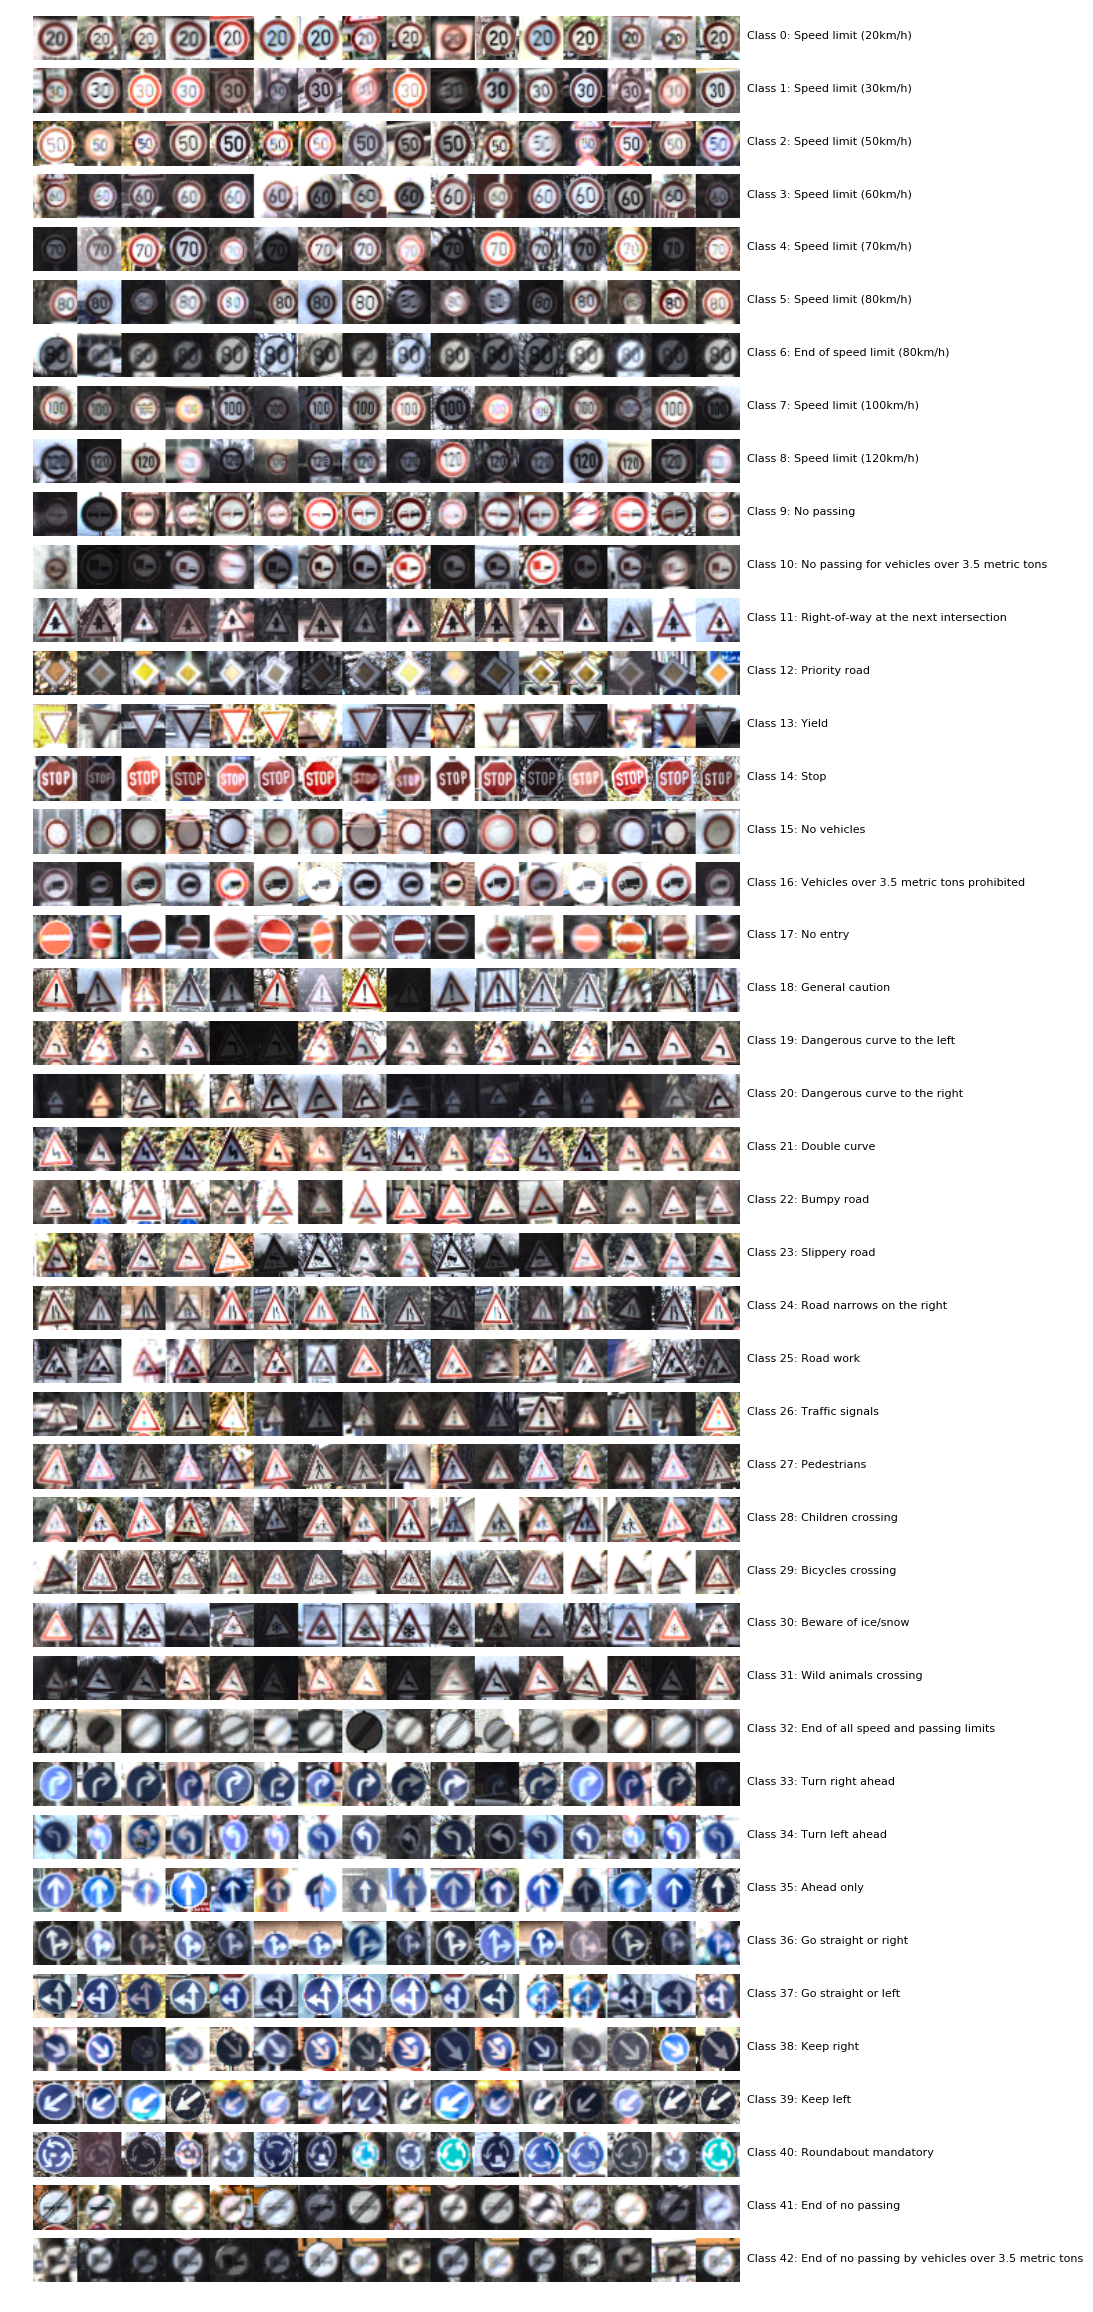

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
claheA = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(2,2))
def brighten_clahe(img, clahe=claheA):
    imgl = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l,a,b = cv2.split(imgl)
    l1 = clahe.apply(l) # L channel
    imgb = cv2.cvtColor(cv2.merge([l1,a,b]), cv2.COLOR_LAB2RGB)
    return imgb

X_train = np.array([brighten_clahe(img) for img in X_train])
X_test = np.array([brighten_clahe(img) for img in X_test])

display(HTML('<h5>Brightened Images (Same Selected Sample As Above)</h5>'))
plt.figure(figsize=(20, (n_classes+2)*.65))
plt.axis('off')
sub_plot_num=1
for key,val in sorted(signnames.items()):
    fig=plt.subplot(n_classes,1,sub_plot_num)
    sub_plot_num += 1
    fig.set_anchor('W')
    plt.axis('off')
    plt.imshow(np.hstack([brighten_clahe(ii[1]) for ii in sample_images[key]]))
    plt.text(num_samples*34.5,10,'Class {}: {}'.format(key,val),ha='left', va='top', fontdict=font)
plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
1. Plot of a few images from training data showed several images are dark/shot in bad lighting conditions.  The paper linked in the instructions mentioned section II B and IIA A about image 'local and global normalization' applied to the image.  It seemed a lot to be https://en.wikipedia.org/wiki/Adaptive_histogram_equalization and some experimentation with channel separation and CV library calls resulted in the brighten_clahe method.
2. I have decided to retain 3-channel colour information as several signs do have different colours.  Though I suspect brightening over L channel from HSL, and then just using H (hue) would have been sufficient.

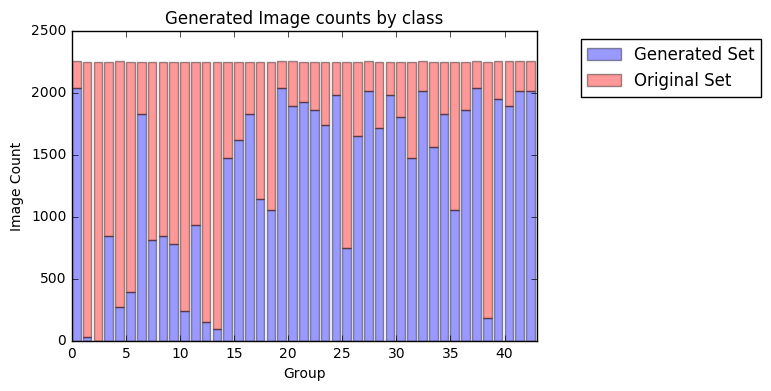

In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from random import randint
from random import triangular
def scale(img, fx=1., fy=1.):
    return cv2.resize(img,None,fx=fx,fy=fy,interpolation=cv2.INTER_CUBIC)
def translate(img, x=10, y=10):
    rows,cols = img.shape[0:2]
    M=np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(img,M,(cols,rows))
def rotate(img, theta=10, scale=1, offcenter=[0,0]):
    rows,cols = img.shape[0:2]
    r1,c1 = rows/2+offcenter[0],cols/2+offcenter[1]
    M=cv2.getRotationMatrix2D((c1,r1),theta, scale)
    return cv2.warpAffine(img,M,(cols,rows))
affline_pts1 = np.float32([[10,10],[20,10],[10,20]])
affline_offsets = np.float32([[2,2],[0,0],[2,2]])
def affline(img, offsets=affline_offsets):
    rows,cols = img.shape[0:2]
    pts2 = affline_pts1 + offsets
    M=cv2.getAffineTransform(affline_pts1,pts2)
    return cv2.warpAffine(img,M,(cols,rows))
perspective_pts1 = np.float32([[0,0],[32,0],[0,32],[32,32]])
perspective_offsets = np.float32([[5,5],[-5,5],[0,0],[0,0]])
def perspective(img, offsets=perspective_offsets):
    rows,cols = img.shape[0:2]
    pts2 = perspective_pts1 + offsets
    M=cv2.getPerspectiveTransform(perspective_pts1,pts2)
    return cv2.warpPerspective(img,M,(cols,rows))
def morph(img):
    rows,cols = img.shape[0:2]
    if not (randint(0,4)): # translate
        img = translate(img, randint(-5,5), randint(-5,5))
    if not (randint(0,4)): # translate
        img = translate(img, randint(-5,5), randint(-5,5))
    if not (randint(0,4)): # rotate
        img = rotate(img, randint(-15,15), triangular(0.5,1.5), [randint(-2,2),randint(-2,2)])
    if not (randint(0,4)): # affline
        img = affline(img, np.float32([[randint(-2,2),randint(-2,2)],[randint(-2,2),randint(-2,2)],[randint(-2,2),randint(-2,2)]]))
    if not (randint(0,4)): # pesrpective
        img = perspective(img, np.float32([[randint(0,9),randint(0,9)],[-randint(0,9),randint(0,9)],[0,0],[0,0]]))
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    return img

max_img_count=max(y_train_freq)
y_train_freq1=np.array(y_train_freq)
X_train_gen,y_train_gen=[[],[]] # temporary vars for storing generated images
generated=True
while generated:
    generated=False
    for img,cls in zip(X_train, y_train):
        if y_train_freq1[cls]>=max_img_count: continue
        X_train_gen.append(morph(img))
        y_train_gen.append(cls)
        y_train_freq1[cls] += 1
        generated=True

# Visualizations will be shown in the notebook.
y_train_gen_freq1=np.bincount(y_train_gen)

%matplotlib inline
opacity = 0.4
x_lbls=range(n_classes)
plt.bar(x_lbls, y_train_gen_freq1, color='b', alpha=opacity, label='Generated Set')
plt.bar(x_lbls, y_train_freq, color='r', bottom=y_train_gen_freq1, alpha=opacity, label='Original Set')

plt.xlabel('Group')
plt.ylabel('Image Count')
plt.title('Generated Image counts by class')
plt.xlim(0, n_classes)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()
X_train = np.concatenate([X_train, X_train_gen])
y_train = np.concatenate([y_train, y_train_gen])

y_train_gen_freq=np.bincount(y_train)
#print(y_train_gen_freq)

In [7]:
### and split the data into training/validation/testing sets here.
from sklearn.utils import shuffle

def split_into_train_and_validation_set(x, y, validation_pct=0.75):
    img_classes={cls:[] for cls in unique_classes}
    for cls,img in zip(y, x):
        img_classes[cls].append(img)
    img_classes = {cls:shuffle(np.array(img_classes[cls])) for cls in img_classes.keys()}
    xtrain,ytrain,xvalidate,yvalidate=[],[],[],[]
    for cls in img_classes.keys():
        spliIndex=int(len(img_classes[cls])*validation_pct)
        xtrain.extend(img_classes[cls][:spliIndex])
        ytrain.extend([cls]*spliIndex)
        remaining=img_classes[cls][spliIndex:]
        xvalidate.extend(remaining)
        yvalidate.extend([cls]*len(remaining))
    xtrain,ytrain,xvalidate,yvalidate=np.array(xtrain),np.array(ytrain),np.array(xvalidate),np.array(yvalidate)
    assert(len(xtrain) == len(ytrain))
    assert(len(xvalidate) == len(yvalidate))
    assert(len(x) == len(ytrain)+len(yvalidate))
    ytrainf0 = np.bincount(y)
    ytrainf=np.bincount(ytrain)
    yvalidatef=np.bincount(yvalidate)
    assert(np.array_equal(ytrainf0, ytrainf+yvalidatef))
    return xtrain,ytrain,xvalidate,yvalidate

xtrain,ytrain,xvalidate,yvalidate=split_into_train_and_validation_set(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

1. 25% of training set split into validation set.  This split percent is applied for data points of each class rather than the whole set.  This way we ensure that validation set has data for all classes.

2. Plot of training data counts for various classes showed that there are a few classes with very little training data.  Wrote image morphers and used it to generate test image data for classes such that there are equal number of test data for each class.

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def conv2d(x, shape, strides=1, padding='VALID', mean=0, stddev=0.1, keep_prob=1.0):
    W = tf.Variable(tf.truncated_normal(shape, mean, stddev))
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    b = tf.Variable(tf.zeros(shape[3]))
    x = tf.nn.bias_add(x, b)
    x = tf.nn.relu(x)
    if keep_prob<1.0:
        x = tf.nn.dropout(x, keep_prob)
    return x

def maxpool2d(x, k=2, padding='VALID'):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)

def avgpool2d(x, k=2, padding='VALID'):
    return tf.nn.avg_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)

def fc2d(x, shape, activate=tf.nn.relu, mean=0, stddev=0.1, keep_prob=1.0):
    W = tf.Variable(tf.truncated_normal(shape, mean, stddev))
    b = tf.Variable(tf.zeros(shape[1]))
    x = tf.matmul(x, W)
    x = tf.nn.bias_add(x, b)
    if activate:
        x = activate(x)
    return x

def LeNet(x, keep_prob=0.5):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    conv1 = conv2d(x, shape=(5, 5, 3, 16), mean = mu, stddev = sigma)
    # SOLUTION: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = avgpool2d(conv1, k=2)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x52.
    conv2 = conv2d(conv1, shape=(5, 5, 16, 52), mean = mu, stddev = sigma)
    conv2 = maxpool2d(conv2, k=2)

    # SOLUTION: Flatten. Input = 5x5x52. Output = 1300.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1300. Output = 800.
    fc1 = fc2d(fc0, shape=(1300, 800), mean = mu, stddev = sigma)

    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 300.
    fc2 = fc2d(fc1, shape=(800, 300), mean = mu, stddev = sigma)

    # SOLUTION: Layer 5: Fully Connected. Input = 300. Output = n_classes=43.
    logits = fc2d(fc2, shape=(300, n_classes), mean = mu, stddev = sigma, activate=None)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

LeNet based architecture is used.  It has two convolution layers with dropout regularisation. Both these convolution layers are followed by a pooling layer.  The output of the concolution layers is flatted and then run through three fully connected layers; eventually producing final output of 43 classes required by the exercise.

Layer# | Input Size | Action | Action Params | Output Size
-------|------------|--------|-------------|------------
1a|32x32x3|Convolution|5x5 convolution on 1x1 stride, Valid padding|28x28x16
||Relu Activation||
1b|28x28x16|Drop Out|10% dropped|28x28x16
1c|28x28x16|Average Pooling|2x2 stride|14x14x16
||||
2a|14x14x16|Convolution|5x5 convolution on 1x1 stride, Valid padding|10x10x52
||Relu Activation||
2b|10x10x52|Drop Out|10% dropped|10x10x52
2c|10x10x52|Max Pooling|2x2 stride|5x5x52
||||
-|5x5x52|Flattened|to produce single vector|1300
||||
3|1300|Fully connected layer|-|800
||Relu Activation||
4|800|Fully connected layer|-|300
||Relu Activation||
5|300|Fully connected layer|-|**43**

The initial weights were obtained by using random selection with mean of 0 and standard deviation of 0.1



In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
rate = tf.placeholder(tf.float32, name='rate') # was 0.001
keep_prob = tf.placeholder(tf.float32, name='keep_prob') # survival rate for drop outs

learn_rate = 0.001
learn_decay_rate = .08 # exponential decay
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, rate: 0.1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
import time

EPOCHS,BATCH_SIZE = 5, 512
EPOCHS,BATCH_SIZE = 5, 256 #.4
EPOCHS,BATCH_SIZE = 5, 128 #.645
EPOCHS,BATCH_SIZE = 5, 64  #.699, 33 s
EPOCHS,BATCH_SIZE = 5, 32  #.707, 32 s
EPOCHS,BATCH_SIZE = 5, 16  #.736, 35 s
EPOCHS,BATCH_SIZE = 5, 8   #.677, 43 s

EPOCHS,BATCH_SIZE = 10, 64  #.803, 33 s
EPOCHS,BATCH_SIZE = 10, 32  #.753, 33 s

EPOCHS,BATCH_SIZE = 30, 64  #.765, 33 s

# expenential decay of learning rate, by 8% per epoc
EPOCHS,BATCH_SIZE,learn_decay_rate = 30, 64, .08  #.765, 33 s

# up survival rate
EPOCHS,BATCH_SIZE,learn_decay_rate,survival_rate = 30, 64, .08, .75  #.867, 33 s
EPOCHS,BATCH_SIZE,learn_decay_rate,survival_rate = 30, 64, .08, 0.9  #.912, 33 s
EPOCHS,BATCH_SIZE,learn_decay_rate,survival_rate = 30, 64, .08, 1.0  #.819, 33 s
EPOCHS,BATCH_SIZE,learn_rate,learn_decay_rate,survival_rate = 30,64,.001,.08,1.0  #.903, 33 s
EPOCHS,BATCH_SIZE,learn_rate,learn_decay_rate,survival_rate = 30,64,.002,.05,1.0  #.893, 33 s
EPOCHS,BATCH_SIZE,learn_rate,learn_decay_rate,survival_rate = 30,64,.002,.05,0.9  #.900, 33 s

# more neurons/features
EPOCHS,BATCH_SIZE,learn_rate,learn_decay_rate,survival_rate = 30,64,.002,.05,0.9  #.900, 33 s
# 1st pooling layer max=>average
EPOCHS,BATCH_SIZE,learn_rate,learn_decay_rate,survival_rate = 30,64,.002,.05,0.9  #.922, 33 s
# 2nd pooling layer max=>average
EPOCHS,BATCH_SIZE,learn_rate,learn_decay_rate,survival_rate = 30,64,.002,.05,0.9  #.885, 33 s

# 1st pooling layer max=>average
EPOCHS,BATCH_SIZE,learn_rate,learn_decay_rate,survival_rate = 125,64,.002,.02,0.9  #.922, 33 s
######################################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    accuracies=[]
    print("Training...")
    print()
    for i in range(EPOCHS):
        t0 = time.time()
        xtrain, ytrain = shuffle(xtrain, ytrain)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = xtrain[offset:end], ytrain[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, rate: learn_rate, keep_prob: survival_rate})
            t1 = time.time()
            #print("  EPOCH {}: els=[{},{}], Sz={}, tm={:0.3f}s".format(i+1, offset, end, BATCH_SIZE, (t1-t0)))
        validation_accuracy = evaluate(xvalidate, yvalidate)
        print("EPOCH {}: Accuracy={:.3f}, BatchSz={}, learn@={}, Tm={:0.3f} s". \
              format(i+1, validation_accuracy, BATCH_SIZE, learn_rate, (time.time()-t0)))
        learn_rate /= (1.0+learn_decay_rate)
        accuracies.append(validation_accuracy)
        avg5=validation_accuracy if i<5 else np.mean(accuracies[-5])
        if validation_accuracy>0.99 and validation_accuracy>avg5: break
        if (i%10)==0:
                t0 = time.time()
                test_accuracy = evaluate(X_test, y_test)
                print("Test Accuracy={:.3f}, TestData={}, Tm={:0.3f} s".format(test_accuracy, len(y_test), (time.time()-t0)))
        
    saver.save(sess, './lenet')
    print()
    print("Model saved")

Training...

EPOCH 1: Accuracy=0.585, BatchSz=64, learn@=0.002, Tm=84.420 s
Test Accuracy=0.621, TestData=12630, Tm=4.441 s
EPOCH 2: Accuracy=0.563, BatchSz=64, learn@=0.00196078431372549, Tm=85.942 s
EPOCH 3: Accuracy=0.727, BatchSz=64, learn@=0.0019223375624759706, Tm=85.084 s
EPOCH 4: Accuracy=0.107, BatchSz=64, learn@=0.0018846446690940887, Tm=86.640 s
EPOCH 5: Accuracy=0.663, BatchSz=64, learn@=0.001847690852053028, Tm=86.207 s
EPOCH 6: Accuracy=0.809, BatchSz=64, learn@=0.0018114616196598314, Tm=86.741 s
EPOCH 7: Accuracy=0.741, BatchSz=64, learn@=0.0017759427643723837, Tm=90.168 s
EPOCH 8: Accuracy=0.202, BatchSz=64, learn@=0.001741120357227827, Tm=86.225 s
EPOCH 9: Accuracy=0.669, BatchSz=64, learn@=0.0017069807423802225, Tm=86.543 s
EPOCH 10: Accuracy=0.789, BatchSz=64, learn@=0.0016735105317453162, Tm=86.915 s
EPOCH 11: Accuracy=0.574, BatchSz=64, learn@=0.00164069659975031, Tm=87.071 s
Test Accuracy=0.607, TestData=12630, Tm=4.345 s
EPOCH 12: Accuracy=0.823, BatchSz=64, lear

In [11]:
import time
BATCH_SIZE=64

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    print()
    print("Model loaded")

    t0 = time.time()
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy={:.3f}, TestData={}, Tm={:0.3f} s".format(test_accuracy, len(y_test), (time.time()-t0)))


Model loaded
Test Accuracy=0.911, TestData=12630, Tm=4.404 s


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- Follwing http://sebastianruder.com/optimizing-gradient-descent/, decided to retain the Adam optimizer.
- Several runs tosettle on batch size, drop out rate, learning rate and learning rate decay.

The tribulations listed in answer to next question.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**


#### Initial Version - Use LeNet based architecture from previous quiz
- Copy LeNet, just change input depth to 3, add dropouts (50% probability) after activations of convolutions
- Follwing http://sebastianruder.com/optimizing-gradient-descent/, decided to retain the Adam optimizer.
- Initial set of trial and errors without any cross validation set generation, nor any pre-processing; all of training data used for training and test data evaluated for accuracy.

###### Pass 1: Batch Size
- Experiment with small epocs (5) and multiple batch sizes
- Settled on batch size of 64 as best tradeoff between accuracy and time elapsed per epoch
- Validated with larger epocs
- After about 15 epocs, accuracy gets stuck at 0.78 +/- 0.04

###### Pass 2: Learning Rate Decay
- Add exponential decay of learn rate for each epoch
- After about 15 epocs, accuracy still gets stuck at 0.78 +/- 0.04

###### Pass 3: Dropout Rate
- Decrease dropout rate (keep_probability = 75%); 
  - After ~15 epocs, accuracy gets stuck at (increased) 0.86 +/- 0.05
- Decrease dropout rate to 10%, accuracy 0.90 +/- 0.01 after ~14 epocs.
- Decrease dropout rate to 0%, accuracy 0.90 +/- 0.01 after ~20 epocs (slower).
- Another run with 10% rate, and tweaked learning rates resulted in reaching .90 accuracy after ~20 epocs
- Settled on 90% as survival rate
- Perhaps the number of features/neurons are not large enough

###### Pass 4: LeNet tweaking
- Increased output depths at convolution layers
  - .90 +/- 0.02, i.e. not much improvement
- Change 1st layer pooling from max pool to avg_pool: .922 accuracy
- Change 2nd layer pooling from max pool to avg_pool: .897 accuracy (worse)
- Settled on 2nd layer pooling being max, and 1st layer bein avg.  After ~30 epochs, accurary=.92

*** So with 2 convolution+pooling layers followed by 3 fully connected layers: the best I got was 92% accuracy

#### Next Version - LeNet based - but pre-process, and generate cross validation set
- Pre-processing added to improve brightness and contrast of the images (described earlier)
- Arrange 75% splitting of training data for each of the classes into validation set
- Reached 0.978 (97.8%) accuracy with for cross validation set.
- Accuracy with test data is 91.2%, which is roughly the same as when no cross validation was used.

#### Next Version - add pre-processing stage to generate images such that there are same number of training images for each class
- Reached 0.911 (91.1%) accuracy with for cross validation set.
- Accuracy with test data is also 91.1%, which is roughly the same as when no cross validation was used.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

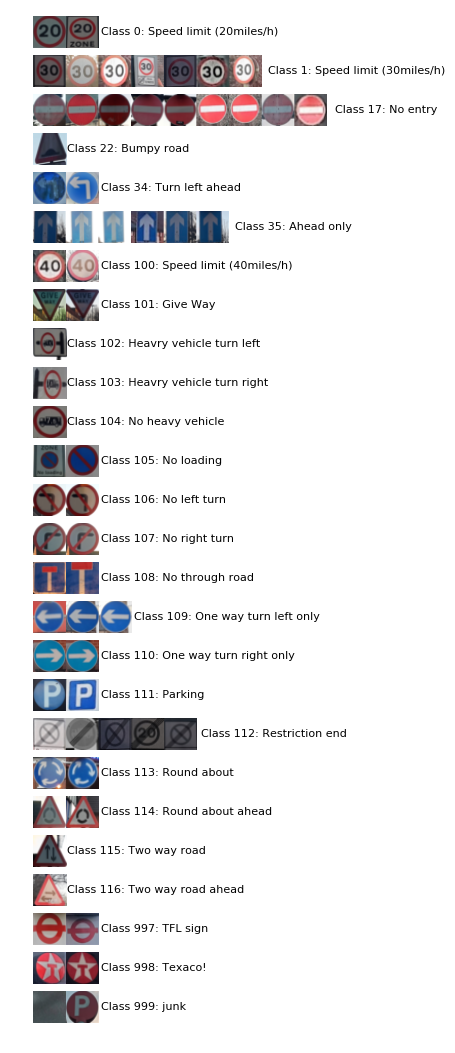

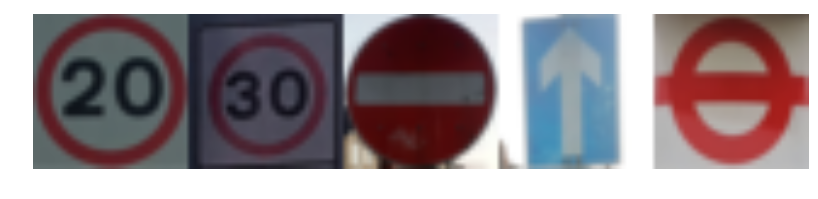

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import pandas
from scipy import misc
from sklearn.utils import shuffle
from math import ceil
uk_sign_iamages_classified=pandas.read_csv('./uk_signs_iamges_classified.csv')
df=uk_sign_iamages_classified
df.sort_values('ClassId', inplace=True)
uk_images=[misc.imresize(im, (32,32)) for im in [misc.imread(file_name) for file_name in df['FileName']]]
uk_y_val=np.array(df['ClassId'])

uk_signnames={row[1]:row[2] for row in df.values}
num_uk_images=len(uk_images)
num_uk_image_classes=len(uk_signnames)
plt.figure(figsize=(20,num_uk_image_classes*.5))

uk_img_dict = {cls:[] for cls in sorted(uk_signnames.keys())}
for ii,cls in enumerate(uk_y_val):
    uk_img_dict[cls].append(uk_images[ii])
font={'size':8, 'weight':'normal'}
sub_plot_num=1
for key,val in sorted(uk_signnames.items()):
    fig=plt.subplot(num_uk_image_classes,1,sub_plot_num)
    sub_plot_num += 1
    fig.set_anchor('W')
    plt.axis('off')
    plt.imshow(np.hstack(uk_img_dict[key]))
    plt.text(len(uk_img_dict[key])*33,10,'Class {}: {}'.format(key,val),ha='left', va='top', fontdict=font)
plt.show()

display(HTML('<h5>Following images chosen (manually) for running through the image classifier:</h5>'))

num_pictures=5
X_uk, y_uk = ([uk_img_dict[0][0], uk_img_dict[1][4], uk_img_dict[17][2], uk_img_dict[35][2], uk_img_dict[997][0]],
              [0,1,17,35,997])
plt.figure(figsize=(20, 2))
plt.imshow(np.hstack(X_uk))
plt.axis('off')
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I took several photos of traffic signs around where I live in the UK.  I manually classified them, and found that there are several of the images that have no corresponding class in the German trafiic signs data set.  For ease, I gave these images class numbers from 100 ownwards.  The images were manually cropped, and then resized to 32x32 in code above.  They have been shown above.

I chose 5 images, one each from different classes.  First four classes are also in the German traffic signs, the fifth image is for Transport for London (TfL) sign (from a bus stop), which is allmost inverted colours from 'No Entry' sign.  These five images are also shown above.

Inadvertently, I discovered a pretty large set of classes that are not in the German traffic sign database.  These will obviously be incorrectly classified.  I had intentionally taken phtos of TfL sign, Texaco gas station sign (!) and a couple of other photos, i classify as Junk above.  While taking the photos, I discovered for myself that it is difficult to get bright sharp images even in good lighting conditions as the light meter of the camera responds to comaprative brightness of surrounding/background.  Quite a few phtos had shade from the light poles/other objects as takes were taken in the evening, around 1.5 hours before the winter sun-set, and hence low sun angle.  I expect that sharp shadows cast may lead to being thought of as a line (feature) and lead to mis-classification.  In short, I expect the following qualities of images to impact clssification:
- low contrast images
- images with dark, sharp shadow lines running accross the sign
- images which are not in the original clssification

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import time
softMx = tf.nn.softmax(logits)
argMx = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    print()
    print("Model loaded")

    t0 = time.time()
    [raw, softmx, argmx] = sess.run([logits, softMx, argMx], feed_dict={x: X_uk, keep_prob: 1.0})
    print("UK TestData={}, Tm={:0.3f} ms".format(len(X_uk), (time.time()-t0)*1000))


Model loaded
UK TestData=5, Tm=6.998 ms


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

###### Initial Submission
The model recognised 3 of the images correctly out of the 4 I was expecting to be correctly recognised. The 5th image (of TfL sign) was not from the class that was in the training set.  Hence I would say, the accuracy was 75% (3 out of 4).

It is interesting to note that the 5th image was classified as 'No passing for vehicles over 3.5 metric tons', which does seem to be pretty close to the TfL image!  I was expecting it to be classified as a 'No Entry' - how naive of me!  I am tempted to push up the accuracy level to 80%...

I am a bit disconcerted by the fact that 20 mph sign (UK traffic signs are in mph) was classified as 120 kmph sign.  This can cause serious incidents if a car was set to follow the upper end of the speed limit.  When I looked back at the training data set, I realise that there are around 1500 images of 120 kmph sign, but less than 250 images of 20 kmph signs.  Clearly the model had a *lot less practice on 20 kmph sign and a lot more on 120 kmph*.  In a future iteration, I will generate more 20 kmph (and other) signs such that roughly equal number of data points are available for each class.  This way, somewhat balanced weights are produced for each class.

###### Submission After Review
The model recognised 3 of the images correctly out of the 4 I was expecting to be correctly recognised. The 5th image (of TfL sign) was not from the class that was in the training set.  

Hence I would say, the accuracy was 75% (3 out of 4); this is lower than the 91.1% accuracy of the model with original test data.  This is somewhat unfair comparision as just 4 images are being tested as against much bigger test data.

The generation of additional training data has resulted in the "20 mph" sign being recognised correctly.  However, the "Ahead Only" sign, which was correctly recognised in previous submission has not been recognised this time.  The training accuracy with cross validation set itself was much lower (at ~91%) compared to previous submission (which was around 98%), which might be a factor for this.


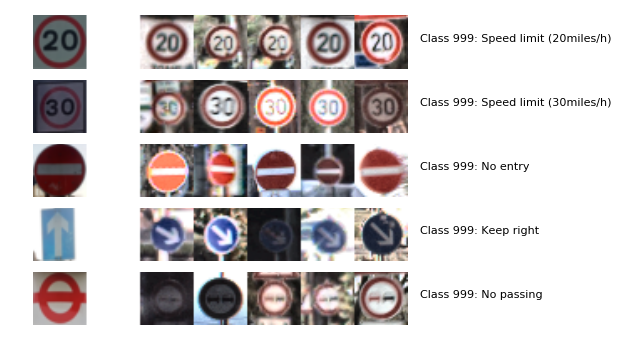

In [17]:
for k,v in uk_signnames.items(): signnames[k]=v
showdata=[[i+1,cls,signnames[cls],y_uk[i],signnames[y_uk[i]],cls==y_uk[i]] \
          for i,cls in enumerate(argmx)]

display(HTML(
    '<table><tr><th>image#</th><th>Assigned Class</th><th>Assigned Sign Name</th>'\
    '<th>Expected Class</th><th>Expected Sign Name</th><th>Correct?</th></tr><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in showdata)
        )
))


empty_image=np.zeros_like(X_uk[0])+255

display(HTML('<h5>Visualising model predictions for the selected images</h5>'))
sub_plot_num=1
for ii,cls in enumerate(argmx):
    fig=plt.subplot(len(argmx),1,sub_plot_num)
    sub_plot_num += 1
    fig.set_anchor('W')
    plt.axis('off')
    imshow=[X_uk[ii], empty_image]
    imshow.extend([brighten_clahe(ii[1]) for ii in sample_images[cls]][:5])
    plt.imshow(np.hstack(imshow))
    plt.text(7*33,10,'Class {}: {}'.format(key, signnames[cls]),ha='left', va='top', fontdict=font)
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:**

For the three correct predictions, the model is very very certain of the prediction (~100%).  Awazingly, for the 5th TfL image too, the model thinks with ~100% certainty that it is the 'No passing for vehicles over 3.5 metric tons' sign!

The 1st image, of the 20 mph sign, the confidence is all over the place.  The top three together just account for just about 17.5% certainity.  In real car, some confidence threshold should be built for such recognition, to prevent the car from speeding up to 120 mph in a 20 mph zone.

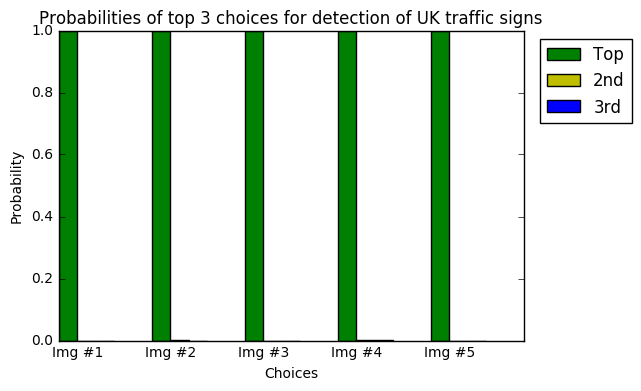

TopKV2(values=array([[  1.00000000e+00,   2.38166873e-38,   0.00000000e+00],
       [  1.00000000e+00,   3.37821125e-11,   1.72285041e-29],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.97961760e-01,   1.06355688e-03,   5.78061678e-04],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[ 0,  8,  1],
       [ 1,  5,  3],
       [17,  0,  1],
       [38, 40, 34],
       [ 9,  0,  1]]))


In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

topK = tf.nn.top_k(softMx, k=3)

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    top3 = sess.run(topK, feed_dict={x: X_uk, keep_prob: 1.0})

ind = np.arange(len(X_uk))
width=.2

fig, ax = plt.subplots()
rects1=ax.bar(ind, top3[0].T[0], width, color='g')
rects2=ax.bar(ind+width, top3[0].T[1], width, color='y')
rects3=ax.bar(ind+2*width, top3[0].T[2], width, color='b')

ax.set_title('Probabilities of top 3 choices for detection of UK traffic signs')
ax.set_ylabel('Probability')
ax.set_xlabel('Choices')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Img #'+str(i+1) for i in ind))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Top', '2nd', '3rd'), bbox_to_anchor=(1.25,1))
plt.show()
print(top3)

showdata=[[i+1,y_uk[i],signnames[y_uk[i]],
           signnames[top3[1][i][0]],top3[0][i][0],
           signnames[top3[1][i][1]],top3[0][i][1],
           signnames[top3[1][i][2]],top3[0][i][2]] \
          for i,cls in enumerate(argmx)]

display(HTML(
    '<table><tr><th>image#</th><th>Expected Class</th><th>Expected Sign Name</th>\
    <th>Top Class Name</th><th>Top Class Probability</th>\
    <th>2nd Class Name</th><th>2nd Class Probability</th>\
    <th>3rd Class Name</th><th>3rd Class Probability</th>\
    </tr><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in showdata)
        )
))

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.